## 第三章 模型搭建 ##

### 8.1特征工程 ###

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1.对分类变量缺失值:填充某个缺失值字符(NA)、用最多类别的进行填充  
2.对连续变量缺失值:填充均值、中位数、众数  

In [3]:
#8.1.1缺失值填充
#填充Embarked(用最多的类别进行填充)
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [4]:
train['Embarked'].fillna('S', inplace=True)
len(train[train['Embarked'].isnull()])

0

In [5]:
#填充Age（用均值进行填充）
train['Age'].fillna(train['Age'].mean(), inplace =True)
len(train[train['Age'].isnull()])

0

In [6]:
#填充Cabin(填充某个缺失值字符(NA))
train['Cabin'].fillna('NA', inplace = True)
len(train[train['Cabin'].isnull()])

0

In [7]:
#把SibSp和Parch特征合并为新特征
def isAlone(df, SibSp, Parch):
    return 1 if (df.SibSp+df.Parch) >= 1 else 0

train['Alone'] = train.apply(isAlone, axis=1, args=('SibSp', 'Parch'))
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [9]:
#8.1.2编码分类变量

#输入特征
data = train[['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Alone']]
data = pd.get_dummies(data)

### 8.2模型搭建 ###

In [10]:
#8.2.1切割训练集和测试集
X = data
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((712, 157), (179, 157))

In [11]:
#8.2.2创建模型

#逻辑回归
lr = LogisticRegression()
lr.fit(X_train, y_train)

#查看训练集和测试集的得分
print(('Training set Score:{:.5f}'.format(lr.score(X_train, y_train))))
print(('Testing set Score:{:.5f}'.format(lr.score(X_test, y_test))))

Training set Score:0.82303
Testing set Score:0.80447


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
#调整模型超参数后的逻辑回归
lr2 = LogisticRegression(C=100)
lr2.fit(X_train, y_train)

#查看训练集和测试集的得分
print(('Training set Score:{:.5f}'.format(lr2.score(X_train, y_train))))
print(('Testing set Score:{:.5f}'.format(lr2.score(X_test, y_test))))

Training set Score:0.82163
Testing set Score:0.80447


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
#随机森林

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#查看训练集和测试集的得分
print(('Training set Score:{:.5f}'.format(rf.score(X_train, y_train))))
print(('Testing set Score:{:.5f}'.format(rf.score(X_test, y_test))))

Training set Score:0.98455
Testing set Score:0.80447


In [14]:
#调整参数后的随机森林

rf2 = RandomForestClassifier(n_estimators=100, max_depth=5) 
rf2.fit(X_train, y_train)

#查看训练集和测试集的得分
print(('Training set Score:{:.5f}'.format(rf2.score(X_train, y_train))))
print(('Testing set Score:{:.5f}'.format(rf2.score(X_test, y_test))))

Training set Score:0.83287
Testing set Score:0.79888


In [15]:
#8.2.3输出模型预测结果

1.输出模型预测分类标签  
2.输出不同分类标签的预测概率

In [16]:
#预测标签
pred = lr.predict(X_train)
pred[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [17]:
#预测标签的概率
pred_proab = lr.predict_proba(X_train)
pred_proab[:10]

array([[0.71931933, 0.28068067],
       [0.78657448, 0.21342552],
       [0.92325173, 0.07674827],
       [0.90591411, 0.09408589],
       [0.31670288, 0.68329712],
       [0.46552891, 0.53447109],
       [0.66812007, 0.33187993],
       [0.70596763, 0.29403237],
       [0.91873542, 0.08126458],
       [0.37327479, 0.62672521]])

## 第三章 模型评估 ##

### 9.1模型评估 ###

In [18]:
#9.1.1交叉验证

lr = LogisticRegression(C=100)
score1 = cross_val_score(lr, X_train, y_train, cv =5)
print(score1)

score2 = cross_val_score(lr, X_train, y_train, cv =10)
print(score2)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.8041958  0.81118881 0.78873239 0.73943662 0.8028169 ]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.81944444 0.75       0.70422535 0.94366197 0.8028169  0.73239437
 0.70422535 0.73239437 0.66197183 0.87323944]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [19]:
# 平均交 验证分数
print("Average cross-validation score: {:.2f}".format(score1.mean()))

Average cross-validation score: 0.79


In [20]:
rf = RandomForestClassifier()
score3 = cross_val_score(rf, X_train, y_train)
score3

array([0.78321678, 0.8041958 , 0.81690141, 0.78169014, 0.87323944])

In [21]:
print("Average cross-validation score: {:.2f}".format(score3.mean()))

Average cross-validation score: 0.81


TN  FP  
FN  TP

In [22]:
#9.1.2混淆矩阵

confusion_matrix(y_train, pred)

array([[382,  62],
       [ 64, 204]])

In [23]:
#精确率、召回率以 f1-score
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       444
           1       0.77      0.76      0.76       268

    accuracy                           0.82       712
   macro avg       0.81      0.81      0.81       712
weighted avg       0.82      0.82      0.82       712



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


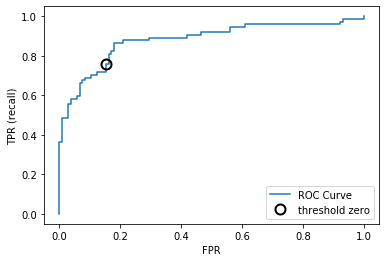

In [30]:
#9.1.3ROC曲线
lrx = LogisticRegression(C=100)
lrx.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, lrx.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)